In [1]:
import random
import matplotlib.pyplot as plt

def flip_coin():
    count = 0
    for _ in range(10):
        if(random.randint(0, 1)) == 1:
            count += 1
    return count

def simulate():
    n = 1000
    rand = random.randint(0, n-1)

    results = [0] * n
    for i in range(n):
        results[i] = flip_coin()

    v_1 = results[0]
    v_rand = results[rand]
    v_min = min(results)
    u = sum(results) / n
    
    return v_1, v_rand, v_min, u

In [ ]:
simulations = 100000
v_1_list = [0] * simulations
v_rand_list = [0] * simulations
v_min_list = [0] * simulations
u_list = [0] * simulations

for i in range(simulations):

    v_1, v_rand, v_min, u = simulate()
    v_1_list[i] = v_1
    v_rand_list[i] = v_rand
    v_min_list[i] = v_min
    u_list[i] = u

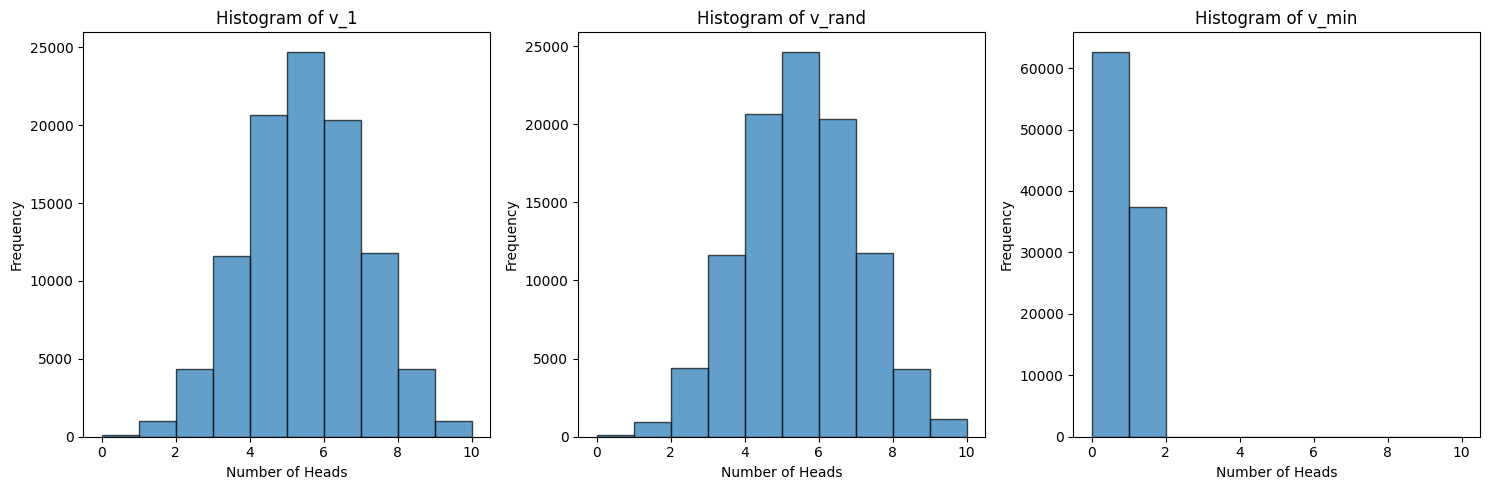

In [ ]:
plt.figure(figsize=(15, 5))

# Histogram for v_1
plt.subplot(1, 3, 1)
plt.hist(v_1_list, bins=range(0, 11), edgecolor='black', alpha=0.7)
plt.title('Histogram of v_1')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

# Histogram for v_rand
plt.subplot(1, 3, 2)
plt.hist(v_rand_list, bins=range(0, 11), edgecolor='black', alpha=0.7)
plt.title('Histogram of v_rand')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

# Histogram for v_min
plt.subplot(1, 3, 3)
plt.hist(v_min_list, bins=range(0, 11), edgecolor='black', alpha=0.7)
plt.title('Histogram of v_min')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

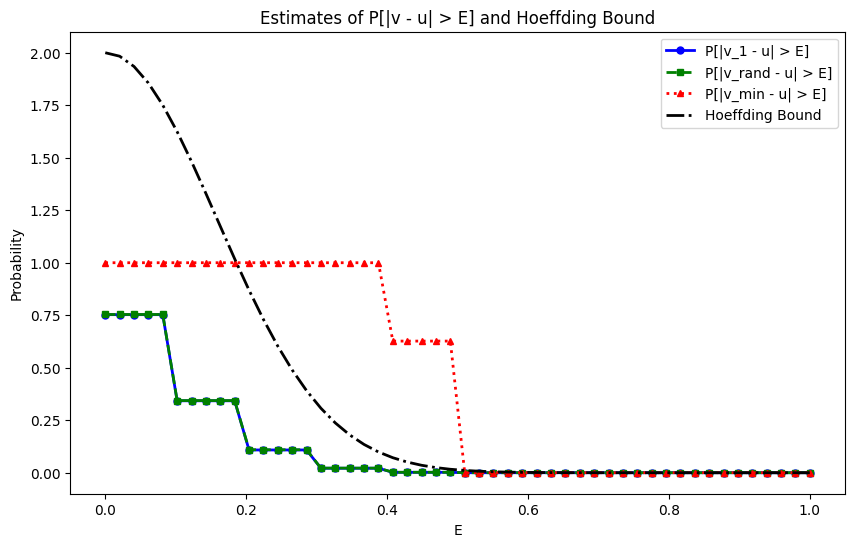

In [ ]:
import numpy as np

E_values = np.linspace(0, 1, 50)

def compute_probabilities(v_list, E_values):
    probabilities = []
    for E in E_values:
        
        counter = 0
        for v in v_list:
            val = abs(v/10 - 0.5)
            if val > E:
                counter += 1
        prob = counter / len(v_list)
        probabilities.append(prob)
    
    return probabilities

p_v_1 = compute_probabilities(v_1_list, E_values)
p_v_rand = compute_probabilities(v_rand_list, E_values)
p_v_min = compute_probabilities(v_min_list, E_values)

hoeffding = 2 * np.exp(-2 * E_values**2 * 10)
plt.figure(figsize=(10, 6))

plt.plot(E_values, p_v_1, label='P[|v_1 - u| > E]', color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)

plt.plot(E_values, p_v_rand, label='P[|v_rand - u| > E]', color='green', marker='s', linestyle='--', linewidth=2, markersize=5)

plt.plot(E_values, p_v_min, label='P[|v_min - u| > E]', color='red', marker='^', linestyle=':', linewidth=2, markersize=5)

plt.plot(E_values, hoeffding, label='Hoeffding Bound', color='black', linestyle='-.', linewidth=2)

plt.xlabel('E')
plt.ylabel('Probability')
plt.title('Estimates of P[|v - u| > E] and Hoeffding Bound')
plt.legend()

plt.show()

